In [69]:
!pip install sklearn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from datetime import datetime

%matplotlib inline

import datetime as dt

In [2]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error, make_scorer


from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier



In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [5]:
app_starts_july_df = pd.read_csv("../dataset/app starts july.txt", delimiter="\t")


In [13]:
app_starts_df = pd.read_csv("../dataset/app starts.txt", delimiter="\t")
print("App Starts Dataset")
app_starts_df.head()

App Starts Dataset


,dateCreated,userId
0,2017-06-30 14:14:54.7930000,50e72534-a4f4-40d7-96d5-ecbe4eb314e9
1,2017-06-30 14:03:13.0100000,b3712849-595e-403f-84d2-4698439056b0
2,2017-06-28 16:26:48.3830000,99cea50b-3ecf-4102-8290-997eaf32a6b6
3,2017-06-27 10:23:29.9430000,78c06433-9ea8-4835-aff5-f64b262d0fb4
4,2017-06-27 10:11:27.6340000,510c5f9e-de54-45ee-909c-c14103130e5e


In [16]:
brochure_views_july_df = pd.read_csv("../dataset/brochure views july.txt", delimiter="\t")
print("July Brochure View Dataset")
brochure_views_july_df.head()

July Brochure View Dataset


,id,userId,dateCreated,page_turn_count,view_duration,brochure_id
0,10670800401,a1bf423c-35d2-4509-8ad2-ec262e46bdb8,2017-07-30 23:55:20.4010000,44,182139.0,631732085
1,12024284821,C9DAFB1D-5D4C-40C4-B3F7-9C542594D128,2017-07-29 12:34:07.0660000,2,3000.0,708990288
2,12026473907,C9DAFB1D-5D4C-40C4-B3F7-9C542594D128,2017-07-29 12:33:21.5520000,26,41000.0,631734737
3,12026471343,C9DAFB1D-5D4C-40C4-B3F7-9C542594D128,2017-07-29 12:32:48.5690000,2,28000.0,709711204
4,12026471276,C9DAFB1D-5D4C-40C4-B3F7-9C542594D128,2017-07-29 12:32:39.8430000,4,6000.0,709626332


In [14]:
brochure_views_df = pd.read_csv("../dataset/brochure views.txt", delimiter="\t")
print("Brochure View Dataset")
brochure_views_df.head()

Brochure View Dataset


,id,userId,dateCreated,page_turn_count,view_duration,brochure_id
0,6269194661,9491a960-206a-4a58-9177-e78cb1f05e70,2017-04-30 23:47:09.5390000,30,95172.0,672239440
1,6269192581,9491a960-206a-4a58-9177-e78cb1f05e70,2017-04-30 23:47:00.6970000,2,4000.0,673861625
2,6269188351,9491a960-206a-4a58-9177-e78cb1f05e70,2017-04-30 23:46:39.9170000,1,14000.0,660764240
3,6204426632,fa623647-dfc9-49b4-bbb6-77cbacd599f4,2017-04-30 23:46:13.5970000,64,168000.0,672658544
4,6204424112,9491a960-206a-4a58-9177-e78cb1f05e70,2017-04-30 23:46:02.1970000,1,33000.0,660764240


In [15]:
installs_df = pd.read_csv("../dataset/installs.txt", delimiter="\t")
print("Install Application Dataset")
installs_df.head()

Install Application Dataset


,id,InstallDate,productId,userId,model,campaignId
0,37371890,2017-05-04 10:06:27.8070000,de.kaufda.kaufda,5fc13850-de51-4426-96ce-72aaec895abb,"ipad2,7",000000
1,36979918,2017-04-24 09:27:16.1730000,com-bonial-kaufda,b13a035e-e9bf-49db-8f93-b49d491bef53,sm-g800f,3iikhy
2,37371070,2017-05-04 16:05:09.5680000,de.kaufda.kaufda,5deb0aad-43bb-4ee1-868b-98f36c3d5bbf,"iphone8,4",tl3cy8
3,36897929,2017-04-22 13:18:18.4370000,com-bonial-kaufda,64707e97-d5e1-4622-a89a-bebf8432fd33,sm-g955f,000000
4,36606053,2017-04-15 14:03:51.1990000,com-bonial-kaufda,770a391d-eda5-423b-b672-845f1e12661f,sm-j320h,000000


In [10]:
app_starts_july_df.head()

,dateCreated,userId
0,2017-07-31 21:24:51.4230000,c6adac02-336f-4cfb-9478-f7b822200215
1,2017-07-31 21:10:24.9810000,4b498ee2-2207-45d6-805e-929491a0bb6a
2,2017-07-31 20:58:27.6010000,e49dd902-816e-4e32-8320-9580340eaa1d
3,2017-07-31 20:41:32.7670000,b28aaf42-476f-489d-8b90-f430a3788c5a
4,2017-07-29 16:51:55.2170000,4bfb581c-a205-4189-bac1-c579fb92c575


In [11]:
brochure_views_df['origin'] = "past"
brochure_views_july_df['origin'] = "july"

train_df = brochure_views_df.append(brochure_views_july_df, ignore_index=True)
train_df = reduce_mem_usage(train_df)


Mem. usage decreased to 14.17 Mb (25.0% reduction)


In [12]:
train_df.head()

,id,userId,dateCreated,page_turn_count,view_duration,brochure_id,origin
0,6269194661,9491a960-206a-4a58-9177-e78cb1f05e70,2017-04-30 23:47:09.5390000,30,95172.0,672239440,past
1,6269192581,9491a960-206a-4a58-9177-e78cb1f05e70,2017-04-30 23:47:00.6970000,2,4000.0,673861625,past
2,6269188351,9491a960-206a-4a58-9177-e78cb1f05e70,2017-04-30 23:46:39.9170000,1,14000.0,660764240,past
3,6204426632,fa623647-dfc9-49b4-bbb6-77cbacd599f4,2017-04-30 23:46:13.5970000,64,168000.0,672658544,past
4,6204424112,9491a960-206a-4a58-9177-e78cb1f05e70,2017-04-30 23:46:02.1970000,1,33000.0,660764240,past


In [13]:
app_starts_df['app_origin'] = "past"
app_starts_july_df['app_origin'] = "july"

train_app_df = app_starts_df.append(app_starts_july_df, ignore_index=True)
train_app_df = reduce_mem_usage(train_app_df)


Mem. usage decreased to  4.21 Mb (0.0% reduction)


In [14]:
train_app_df2 = pd.merge(train_app_df, installs_df,
                        how="left", on=["userId"])
train_app_df2.head()

,dateCreated,userId,app_origin,id,InstallDate,productId,model,campaignId
0,2017-06-30 14:14:54.7930000,50e72534-a4f4-40d7-96d5-ecbe4eb314e9,past,36840989.0,2017-04-21 13:16:18.5990000,com-bonial-kaufda,sm-g950f,000000
1,2017-06-30 14:03:13.0100000,b3712849-595e-403f-84d2-4698439056b0,past,37125830.0,2017-04-28 15:28:20.5460000,com-bonial-kaufda,sm-g935f,000000
2,2017-06-28 16:26:48.3830000,99cea50b-3ecf-4102-8290-997eaf32a6b6,past,37547780.0,2017-05-09 20:45:19.7230000,com-bonial-kaufda,sm-j510fn,000000
3,2017-06-27 10:23:29.9430000,78c06433-9ea8-4835-aff5-f64b262d0fb4,past,37860542.0,2017-05-15 13:29:37.3770000,com-bonial-kaufda,sm-g900f,000000
4,2017-06-27 10:11:27.6340000,510c5f9e-de54-45ee-909c-c14103130e5e,past,37462735.0,2017-05-07 08:03:04.5730000,com-bonial-kaufda,sm-t561,000000


In [15]:
r = lambda: random.randint(0,255)

train_app_df2.id = train_app_df2.id.fillna(0)
train_app_df2.productId = train_app_df2.productId.fillna(0)
train_app_df2.model = train_app_df2.model.fillna("XXX")
#train_app_df2.campaignId = train_app_df2.campaignId.fillna('%02X%02X%02X' % (r(),r(),r()))
train_app_df2.campaignId = train_app_df2.campaignId.fillna('XXXXXX')
train_app_df2.InstallDate = train_app_df2.InstallDate.fillna('2000-01-01 00:00:01.0000000')


In [16]:
train_app_df2.head()

,dateCreated,userId,app_origin,id,InstallDate,productId,model,campaignId
0,2017-06-30 14:14:54.7930000,50e72534-a4f4-40d7-96d5-ecbe4eb314e9,past,36840989.0,2017-04-21 13:16:18.5990000,com-bonial-kaufda,sm-g950f,000000
1,2017-06-30 14:03:13.0100000,b3712849-595e-403f-84d2-4698439056b0,past,37125830.0,2017-04-28 15:28:20.5460000,com-bonial-kaufda,sm-g935f,000000
2,2017-06-28 16:26:48.3830000,99cea50b-3ecf-4102-8290-997eaf32a6b6,past,37547780.0,2017-05-09 20:45:19.7230000,com-bonial-kaufda,sm-j510fn,000000
3,2017-06-27 10:23:29.9430000,78c06433-9ea8-4835-aff5-f64b262d0fb4,past,37860542.0,2017-05-15 13:29:37.3770000,com-bonial-kaufda,sm-g900f,000000
4,2017-06-27 10:11:27.6340000,510c5f9e-de54-45ee-909c-c14103130e5e,past,37462735.0,2017-05-07 08:03:04.5730000,com-bonial-kaufda,sm-t561,000000


In [17]:
train_app_df2['dateCreated'] = pd.to_datetime(train_app_df2['dateCreated'], format='%Y-%m-%d')
train_app_df2['dateCreated'] = train_app_df2['dateCreated'].dt.strftime('%Y-%m-%d')

In [18]:
train_app_df2['InstallDate'] = pd.to_datetime(train_app_df2['InstallDate'], format='%Y-%m-%d')
train_app_df2['InstallDate'] = train_app_df2['InstallDate'].dt.strftime('%Y-%m-%d')

In [19]:
train_df['dateCreated'] = pd.to_datetime(train_df['dateCreated'], format='%Y-%m-%d')
train_df['dateCreated'] = train_df['dateCreated'].dt.strftime('%Y-%m-%d')

In [20]:
train_df.shape, train_app_df2.shape

((353644, 7), (184073, 8))

In [21]:
train_df = train_df.drop(columns='id')
train_app_df2 = train_app_df2.drop(columns='id')

In [22]:
train_df['year'] = pd.DatetimeIndex(train_df['dateCreated']).year
train_df['month'] = pd.DatetimeIndex(train_df['dateCreated']).month
train_df['day'] = pd.DatetimeIndex(train_df['dateCreated']).day

train_app_df2['year'] = pd.DatetimeIndex(train_app_df2['dateCreated']).year
train_app_df2['month'] = pd.DatetimeIndex(train_app_df2['dateCreated']).month
train_app_df2['day'] = pd.DatetimeIndex(train_app_df2['dateCreated']).day

train_app_df2.InstallDate = train_app_df2.InstallDate.fillna('2000-01-01 00:00:01.0000000')
train_app_df2['install_year'] = pd.DatetimeIndex(train_app_df2['InstallDate']).year
train_app_df2['install_month'] = pd.DatetimeIndex(train_app_df2['InstallDate']).month
train_app_df2['install_day'] = pd.DatetimeIndex(train_app_df2['InstallDate']).day

In [23]:
train_app_df2.install_year.unique()

array([2017, 2000], dtype=int64)

In [24]:
train_df = train_df.drop(columns='dateCreated')
train_app_df2 = train_app_df2.drop(columns='dateCreated')
train_app_df2 = train_app_df2.drop(columns='InstallDate')

In [25]:
train_df.head()

,userId,page_turn_count,view_duration,brochure_id,origin,year,month,day
0,9491a960-206a-4a58-9177-e78cb1f05e70,30,95172.0,672239440,past,2017,4,30
1,9491a960-206a-4a58-9177-e78cb1f05e70,2,4000.0,673861625,past,2017,4,30
2,9491a960-206a-4a58-9177-e78cb1f05e70,1,14000.0,660764240,past,2017,4,30
3,fa623647-dfc9-49b4-bbb6-77cbacd599f4,64,168000.0,672658544,past,2017,4,30
4,9491a960-206a-4a58-9177-e78cb1f05e70,1,33000.0,660764240,past,2017,4,30


In [26]:
train_app_df2.head()

,userId,app_origin,productId,model,campaignId,year,month,day,install_year,install_month,install_day
0,50e72534-a4f4-40d7-96d5-ecbe4eb314e9,past,com-bonial-kaufda,sm-g950f,000000,2017,6,30,2017,4,21
1,b3712849-595e-403f-84d2-4698439056b0,past,com-bonial-kaufda,sm-g935f,000000,2017,6,30,2017,4,28
2,99cea50b-3ecf-4102-8290-997eaf32a6b6,past,com-bonial-kaufda,sm-j510fn,000000,2017,6,28,2017,5,9
3,78c06433-9ea8-4835-aff5-f64b262d0fb4,past,com-bonial-kaufda,sm-g900f,000000,2017,6,27,2017,5,15
4,510c5f9e-de54-45ee-909c-c14103130e5e,past,com-bonial-kaufda,sm-t561,000000,2017,6,27,2017,5,7


In [27]:
train_df2 = pd.merge(train_df, train_app_df2,
                        how="left", on=["userId", "year", "month", "day"])
train_df2.head()

,userId,page_turn_count,view_duration,brochure_id,origin,year,month,day,app_origin,productId,model,campaignId,install_year,install_month,install_day
0,9491a960-206a-4a58-9177-e78cb1f05e70,30,95172.0,672239440,past,2017,4,30,past,com-bonial-kaufda,GT-I9505,m9l4xq,2017.0,4.0,2.0
1,9491a960-206a-4a58-9177-e78cb1f05e70,30,95172.0,672239440,past,2017,4,30,past,com-bonial-kaufda,GT-I9505,m9l4xq,2017.0,4.0,2.0
2,9491a960-206a-4a58-9177-e78cb1f05e70,2,4000.0,673861625,past,2017,4,30,past,com-bonial-kaufda,GT-I9505,m9l4xq,2017.0,4.0,2.0
3,9491a960-206a-4a58-9177-e78cb1f05e70,2,4000.0,673861625,past,2017,4,30,past,com-bonial-kaufda,GT-I9505,m9l4xq,2017.0,4.0,2.0
4,9491a960-206a-4a58-9177-e78cb1f05e70,1,14000.0,660764240,past,2017,4,30,past,com-bonial-kaufda,GT-I9505,m9l4xq,2017.0,4.0,2.0


In [28]:
train_df2 = reduce_mem_usage(train_df2)

Mem. usage decreased to 39.62 Mb (33.3% reduction)


In [29]:
train_df2 = train_df2.drop_duplicates()

In [30]:
train_df2.columns

Index(['userId', 'page_turn_count', 'view_duration', 'brochure_id', 'origin',
       'year', 'month', 'day', 'app_origin', 'productId', 'model',
       'campaignId', 'install_year', 'install_month', 'install_day'],
      dtype='object')

In [31]:
train_df2.install_year = train_df2.install_year.fillna('2000')
train_df2.install_month = train_df2.install_month.fillna('01')
train_df2.install_day = train_df2.install_day.fillna('01')



In [32]:
train_df2.install_year.unique()

array([2017.0, '2000'], dtype=object)

In [33]:
train_df2.install_year.unique()

array([2017.0, '2000'], dtype=object)

In [34]:
df = train_app_df.copy()
df = df.groupby(["userId"]).agg({'dateCreated': [np.min, np.max]})

df.head()

dateCreated  \
                                                             amin   
userId                                                              
0000bb01-a52b-4b4c-a0dd-8ef80f0a810c  2017-05-08 13:25:41.3060000   
0002c218-d30f-402e-ae08-1280ad4fb669  2017-04-24 22:44:19.1210000   
000691c6-4289-47f8-81f1-628e52ed5429  2017-04-25 17:04:05.2270000   
00095350-9e64-4b34-9112-b9869703248b  2017-04-07 11:59:03.8880000   
00095653-80f8-4fba-93d9-44ae70bb6263  2017-05-09 14:07:07.5480000   

                                                                   
                                                             amax  
userId                                                             
0000bb01-a52b-4b4c-a0dd-8ef80f0a810c  2017-05-08 13:25:41.3060000  
0002c218-d30f-402e-ae08-1280ad4fb669  2017-04-29 22:33:00.8390000  
000691c6-4289-47f8-81f1-628e52ed5429  2017-04-25 17:04:05.2270000  
00095350-9e64-4b34-9112-b9869703248b  2017-04-08 10:15:48.1170000  
00095653-80f8-4fba-93d9-44ae70bb6263  2017-06-21 15:51:46.1330000

In [35]:
train_df3 = pd.merge(train_df2, df,
                        how="left", on=["userId"])
train_df3.head()

,userId,page_turn_count,view_duration,brochure_id,origin,year,month,day,app_origin,productId,model,campaignId,install_year,install_month,install_day,"(dateCreated, amin)","(dateCreated, amax)"
0,9491a960-206a-4a58-9177-e78cb1f05e70,30,95172.0,672239440,past,2017,4,30,past,com-bonial-kaufda,GT-I9505,m9l4xq,2017.0,4.0,2.0,2017-04-02 09:50:54.0000000,2017-07-31 19:43:16.7780000
1,9491a960-206a-4a58-9177-e78cb1f05e70,2,4000.0,673861625,past,2017,4,30,past,com-bonial-kaufda,GT-I9505,m9l4xq,2017.0,4.0,2.0,2017-04-02 09:50:54.0000000,2017-07-31 19:43:16.7780000
2,9491a960-206a-4a58-9177-e78cb1f05e70,1,14000.0,660764240,past,2017,4,30,past,com-bonial-kaufda,GT-I9505,m9l4xq,2017.0,4.0,2.0,2017-04-02 09:50:54.0000000,2017-07-31 19:43:16.7780000
3,fa623647-dfc9-49b4-bbb6-77cbacd599f4,64,168000.0,672658544,past,2017,4,30,past,com-bonial-kaufda,HUAWEI+VNS-L31,z4l9l8,2017.0,4.0,1.0,2017-04-01 11:53:40.0000000,2017-06-21 11:44:13.1740000
4,9491a960-206a-4a58-9177-e78cb1f05e70,1,33000.0,660764240,past,2017,4,30,past,com-bonial-kaufda,GT-I9505,m9l4xq,2017.0,4.0,2.0,2017-04-02 09:50:54.0000000,2017-07-31 19:43:16.7780000


In [36]:
train_df3['first_data_date'] = train_df3['dateCreated', 'amin']

train_df3['last_data_date'] = train_df3['dateCreated', 'amax']


In [37]:
train_df3.columns

Index([               'userId',       'page_turn_count',
               'view_duration',           'brochure_id',
                      'origin',                  'year',
                       'month',                   'day',
                  'app_origin',             'productId',
                       'model',            'campaignId',
                'install_year',         'install_month',
                 'install_day', ('dateCreated', 'amin'),
       ('dateCreated', 'amax'),       'first_data_date',
              'last_data_date'],
      dtype='object')

In [38]:
train_df4 = train_df3[['userId', 'page_turn_count', 'view_duration', 'brochure_id',
                      'origin', 'year', 'month', 'day', 'app_origin', 'productId', 
                       'model', 'campaignId', 'install_year', 'install_month', 'install_day',
                       'first_data_date', 'last_data_date']].copy()
train_df4.head()

,userId,page_turn_count,view_duration,brochure_id,origin,year,month,day,app_origin,productId,model,campaignId,install_year,install_month,install_day,first_data_date,last_data_date
0,9491a960-206a-4a58-9177-e78cb1f05e70,30,95172.0,672239440,past,2017,4,30,past,com-bonial-kaufda,GT-I9505,m9l4xq,2017.0,4.0,2.0,2017-04-02 09:50:54.0000000,2017-07-31 19:43:16.7780000
1,9491a960-206a-4a58-9177-e78cb1f05e70,2,4000.0,673861625,past,2017,4,30,past,com-bonial-kaufda,GT-I9505,m9l4xq,2017.0,4.0,2.0,2017-04-02 09:50:54.0000000,2017-07-31 19:43:16.7780000
2,9491a960-206a-4a58-9177-e78cb1f05e70,1,14000.0,660764240,past,2017,4,30,past,com-bonial-kaufda,GT-I9505,m9l4xq,2017.0,4.0,2.0,2017-04-02 09:50:54.0000000,2017-07-31 19:43:16.7780000
3,fa623647-dfc9-49b4-bbb6-77cbacd599f4,64,168000.0,672658544,past,2017,4,30,past,com-bonial-kaufda,HUAWEI+VNS-L31,z4l9l8,2017.0,4.0,1.0,2017-04-01 11:53:40.0000000,2017-06-21 11:44:13.1740000
4,9491a960-206a-4a58-9177-e78cb1f05e70,1,33000.0,660764240,past,2017,4,30,past,com-bonial-kaufda,GT-I9505,m9l4xq,2017.0,4.0,2.0,2017-04-02 09:50:54.0000000,2017-07-31 19:43:16.7780000


In [39]:
user_list = train_df4[train_df4.origin == "past"].userId.unique()
active_list = train_df4[train_df4.origin == "july"].userId.unique()
churn_list = set(user_list) - set(active_list)

In [40]:
len(user_list), len(active_list), len(churn_list)

(10943, 3751, 7310)

In [41]:
churn_dictionary = dict.fromkeys(churn_list, 1)
train_df4['churn'] = train_df4['userId'].map(churn_dictionary)
train_df4['churn'].fillna(0, inplace=True)

In [42]:
train_df4[train_df4.origin == "past"].churn.value_counts()

0.0    191062
1.0     86720
Name: churn, dtype: int64

In [45]:
train_df4.model.nunique(), train_df4.campaignId.nunique(), train_df4.productId.nunique(), train_df4.brochure_id.nunique()

(938, 619, 3, 22854)

<AxesSubplot:xlabel='month', ylabel='Density'>

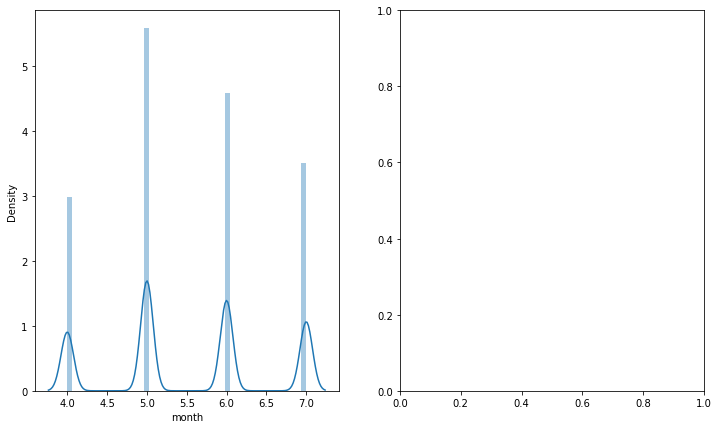

In [46]:
fig, axes = plt.subplots(1,2, figsize=(12, 7))
sns.distplot(train_df4["month"], ax=axes[0])


<AxesSubplot:xlabel='campaignId', ylabel='count'>

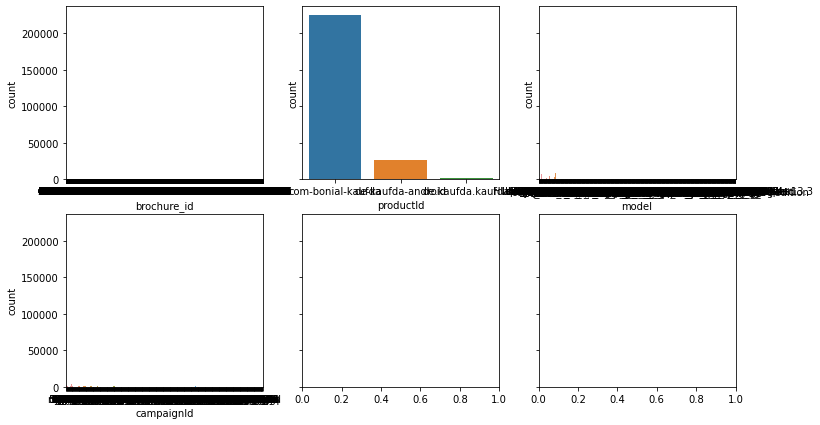

In [47]:
fig, axes = plt.subplots(2, 3, figsize=(12, 7), sharey=True)
sns.countplot("brochure_id", data=train_df4, ax=axes[0,0])
sns.countplot("productId", data=train_df4, ax=axes[0,1])
sns.countplot("model", data=train_df4, ax=axes[0,2])
sns.countplot("campaignId", data=train_df4, ax=axes[1,0])

In [48]:
train_df4[['productId','churn']].groupby(['productId']).mean()

,churn
productId,
com-bonial-kaufda,0.248051
de-kaufda-android,0.212519
de.kaufda.kaufda,0.630607


In [49]:
train_df4[['month','churn']].groupby(['month']).mean()

,churn
month,
4,0.510315
5,0.348601
6,0.138982
7,0.000000


In [50]:
train_df4.columns

Index(['userId', 'page_turn_count', 'view_duration', 'brochure_id', 'origin',
       'year', 'month', 'day', 'app_origin', 'productId', 'model',
       'campaignId', 'install_year', 'install_month', 'install_day',
       'first_data_date', 'last_data_date', 'churn'],
      dtype='object')

In [51]:
train_df4['last_data_date'] = pd.to_datetime(train_df4['last_data_date'], format='%Y-%m-%d')
train_df4['last_data_date'] = train_df4['last_data_date'].dt.strftime('%Y-%m-%d')

train_df4.last_data_date = train_df4.last_data_date.fillna('2000-01-01 00:00:01.0000000')
train_df4['last_year'] = pd.DatetimeIndex(train_df4['last_data_date']).year
train_df4['last_month'] = pd.DatetimeIndex(train_df4['last_data_date']).month
train_df4['last_day'] = pd.DatetimeIndex(train_df4['last_data_date']).day

train_df4 = train_df4.drop(columns='last_data_date')

train_df4['first_data_date'] = pd.to_datetime(train_df4['first_data_date'], format='%Y-%m-%d')
train_df4['first_data_date'] = train_df4['first_data_date'].dt.strftime('%Y-%m-%d')

train_df4.first_data_date = train_df4.first_data_date.fillna('2000-01-01 00:00:01.0000000')
train_df4['first_year'] = pd.DatetimeIndex(train_df4['first_data_date']).year
train_df4['first_month'] = pd.DatetimeIndex(train_df4['first_data_date']).month
train_df4['first_day'] = pd.DatetimeIndex(train_df4['first_data_date']).day

train_df4 = train_df4.drop(columns='first_data_date')

In [52]:
train_df4.InstallDate = train_df4.install_year.fillna("2000")
train_df4.InstallDate = train_df4.install_month.fillna('01')
train_df4.InstallDate = train_df4.install_day.fillna('01')

In [53]:
train_df4.install_year.unique()

array([2017., 2000.])

In [54]:
train_df4.to_csv("../dataset/brochure_view_dataset.csv", index=False)
train_df4 = pd.read_csv("../dataset/brochure_view_dataset.csv")
train_df4.head()

,userId,page_turn_count,view_duration,brochure_id,origin,year,month,day,app_origin,productId,...,install_year,install_month,install_day,churn,last_year,last_month,last_day,first_year,first_month,first_day
0,9491a960-206a-4a58-9177-e78cb1f05e70,30,95172.0,672239440,past,2017,4,30,past,com-bonial-kaufda,...,2017.0,4.0,2.0,0.0,2017,7,31,2017,4,2
1,9491a960-206a-4a58-9177-e78cb1f05e70,2,4000.0,673861625,past,2017,4,30,past,com-bonial-kaufda,...,2017.0,4.0,2.0,0.0,2017,7,31,2017,4,2
2,9491a960-206a-4a58-9177-e78cb1f05e70,1,14000.0,660764240,past,2017,4,30,past,com-bonial-kaufda,...,2017.0,4.0,2.0,0.0,2017,7,31,2017,4,2
3,fa623647-dfc9-49b4-bbb6-77cbacd599f4,64,168000.0,672658544,past,2017,4,30,past,com-bonial-kaufda,...,2017.0,4.0,1.0,1.0,2017,6,21,2017,4,1
4,9491a960-206a-4a58-9177-e78cb1f05e70,1,33000.0,660764240,past,2017,4,30,past,com-bonial-kaufda,...,2017.0,4.0,2.0,0.0,2017,7,31,2017,4,2


In [122]:
train_df4 = pd.concat([train_df4, pd.get_dummies(train_df4["productId"],prefix="product_cat_")], axis=1)
train_df4.drop(columns=["productId"], axis=1, inplace=True)

train_df4.head()

,userId,page_turn_count,view_duration,brochure_id,origin,year,month,day,app_origin,model,...,churn,last_year,last_month,last_day,first_year,first_month,first_day,product_cat__com-bonial-kaufda,product_cat__de-kaufda-android,product_cat__de.kaufda.kaufda
0,9491a960-206a-4a58-9177-e78cb1f05e70,30,95172.0,672239440,past,2017,4,30,past,GT-I9505,...,0.0,2017,7,31,2017,4,2,1,0,0
1,9491a960-206a-4a58-9177-e78cb1f05e70,2,4000.0,673861625,past,2017,4,30,past,GT-I9505,...,0.0,2017,7,31,2017,4,2,1,0,0
2,9491a960-206a-4a58-9177-e78cb1f05e70,1,14000.0,660764240,past,2017,4,30,past,GT-I9505,...,0.0,2017,7,31,2017,4,2,1,0,0
3,fa623647-dfc9-49b4-bbb6-77cbacd599f4,64,168000.0,672658544,past,2017,4,30,past,HUAWEI+VNS-L31,...,1.0,2017,6,21,2017,4,1,1,0,0
4,9491a960-206a-4a58-9177-e78cb1f05e70,1,33000.0,660764240,past,2017,4,30,past,GT-I9505,...,0.0,2017,7,31,2017,4,2,1,0,0


In [123]:
train_df4.origin.unique()

array(['past', 'july'], dtype=object)

In [124]:
train_df4["origin"] = train_df4["origin"].replace('past', 0)
train_df4["origin"] = train_df4["origin"].replace('july', 1)
train_df4["origin"] = train_df4["origin"].fillna(-1)

train_df4["app_origin"] = train_df4["app_origin"].replace('past', 0)
train_df4["app_origin"] = train_df4["app_origin"].replace('july', 1)
train_df4["app_origin"] = train_df4["app_origin"].fillna(-1)

In [125]:
train_df4.model = train_df4.model.str.lower()

In [126]:
train_df4["model"] = train_df4["model"].fillna("other")

train_df4["model"] = train_df4["model"].apply(lambda x: x.split("-")[0])
train_df4["model"] = train_df4["model"].apply(lambda x: x.split("+")[0])
train_df4["model"] = train_df4["model"].apply(lambda x: x.split("_")[0])
train_df4["model"] = train_df4["model"].apply(lambda x: x.split(",")[0])
train_df4["model"] = train_df4["model"].apply(lambda x: x.split(".")[0])
train_df4.model.unique()

array(['gt', 'huawei', 'other', 'sm', 'lg', 'vie', 'moto', 'htc', 'c6903',
       'e2303', 'd6603', 'power', 'd6503', 'medion', 'odys', 'vtr', 'a3',
       'zte', 'f3311', 's57', 'lenovo', 'mha', 'lenny2', 'discovery',
       'g3121', 'redmi', 'cynus', 'e5603', 'a1', 'frd', 'ale', 'was',
       'eva', '5051d', 't09', 't08', 'e6653', 'xt1032', 'xxx', 'e5823',
       'nexus', 'm20', 'c6902', 'a', 'pra', 'sgpt12', 'archos', 'highway',
       'c6603', 'v81', 'f5121', 'pulp', 'd5803', 'gigaset', 'smartbook',
       'f8331', 'lifetab', 'bv5000', 'x550', 'f5321', 'phicomm', 'hp',
       'd5503', 'z520', 'e6833', 'plus', 'p1040x', 'motog3', 'i545',
       'x11', 'rainbow', 'z10', 'oneplus', 'neo6', 'fever', 's60',
       'ahiga', 's10q', '3007', 'vf', 'plk', 'f3111', 'satellite',
       'xt1650', 'e6853', 'jerry', 'e6553', 'me302c', 'sd4930ur', 't07',
       'cubot', 'metal', 'p9000', 'vfd', 'elephone', 'c6503', 'aquaris',
       'maven', 'turb02', 'surftab', 'coolpad', 'one', 'l52', 'b3',
   

In [127]:
train_df4["model"] = train_df4["model"].str.replace('\d+', '')
train_df4.model.nunique()

195

In [128]:
model_undefined_list = ['c', 'e', 'd', 'a', 'f', 's', 'g',
                         't',  'm', 'v', 'x', 'z', 'i', '',
                         'p', 'l', 'b', 'k', 'u', 'h', 'y', 'r']
samsung_list = ['sm', 'galaxy', 'one']
apple_list = ['xpro', 'ipad', 'iphone']
xiaomi_list = ['mi', 'redmi']

In [129]:
train_df4.loc[train_df4['model'].isin(model_undefined_list), ['model']] = 'undefined'
train_df4.loc[train_df4['model'] .isin(samsung_list), ['model']] = 'samsung'
train_df4.loc[train_df4['model'].isin(apple_list), ['model']] = 'apple'
train_df4.loc[train_df4['model'].isin(xiaomi_list), ['model']] = 'xiaomi'
train_df4.loc[train_df4['model'] == 'tolino tab ', ['model']] = 'tolino'




In [130]:
train_df4['model'].nunique()

168

In [131]:
train_df4.head()

,userId,page_turn_count,view_duration,brochure_id,origin,year,month,day,app_origin,model,...,churn,last_year,last_month,last_day,first_year,first_month,first_day,product_cat__com-bonial-kaufda,product_cat__de-kaufda-android,product_cat__de.kaufda.kaufda
0,9491a960-206a-4a58-9177-e78cb1f05e70,30,95172.0,672239440,0,2017,4,30,0.0,gt,...,0.0,2017,7,31,2017,4,2,1,0,0
1,9491a960-206a-4a58-9177-e78cb1f05e70,2,4000.0,673861625,0,2017,4,30,0.0,gt,...,0.0,2017,7,31,2017,4,2,1,0,0
2,9491a960-206a-4a58-9177-e78cb1f05e70,1,14000.0,660764240,0,2017,4,30,0.0,gt,...,0.0,2017,7,31,2017,4,2,1,0,0
3,fa623647-dfc9-49b4-bbb6-77cbacd599f4,64,168000.0,672658544,0,2017,4,30,0.0,huawei,...,1.0,2017,6,21,2017,4,1,1,0,0
4,9491a960-206a-4a58-9177-e78cb1f05e70,1,33000.0,660764240,0,2017,4,30,0.0,gt,...,0.0,2017,7,31,2017,4,2,1,0,0


In [132]:
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
train_df4['model'] = labelencoder.fit_transform(train_df4['model'])
train_df4['campaignId'] = labelencoder.fit_transform(train_df4['campaignId'])

train_df4.head()

,userId,page_turn_count,view_duration,brochure_id,origin,year,month,day,app_origin,model,...,churn,last_year,last_month,last_day,first_year,first_month,first_day,product_cat__com-bonial-kaufda,product_cat__de-kaufda-android,product_cat__de.kaufda.kaufda
0,9491a960-206a-4a58-9177-e78cb1f05e70,30,95172.0,672239440,0,2017,4,30,0.0,34,...,0.0,2017,7,31,2017,4,2,1,0,0
1,9491a960-206a-4a58-9177-e78cb1f05e70,2,4000.0,673861625,0,2017,4,30,0.0,34,...,0.0,2017,7,31,2017,4,2,1,0,0
2,9491a960-206a-4a58-9177-e78cb1f05e70,1,14000.0,660764240,0,2017,4,30,0.0,34,...,0.0,2017,7,31,2017,4,2,1,0,0
3,fa623647-dfc9-49b4-bbb6-77cbacd599f4,64,168000.0,672658544,0,2017,4,30,0.0,40,...,1.0,2017,6,21,2017,4,1,1,0,0
4,9491a960-206a-4a58-9177-e78cb1f05e70,1,33000.0,660764240,0,2017,4,30,0.0,34,...,0.0,2017,7,31,2017,4,2,1,0,0


In [133]:
train_df4['view_duration'] = train_df4['view_duration'].fillna(0.1)

In [134]:
sc = MinMaxScaler()
ptc = sc.fit_transform(train_df4[['page_turn_count']])
vd = sc.fit_transform(train_df4[['view_duration']])
train_df4['page_turn_count'] = ptc
train_df4['view_duration'] = vd

Text(0.5, 1.0, 'Class Distribution Before Resampling')

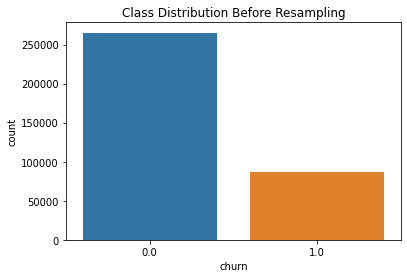

In [135]:
sns.countplot('churn', data=train_df4).set_title('Class Distribution Before Resampling')

In [136]:
train_df4.to_csv("../dataset/churn_dataset.csv", index=False)